In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df_datos_autos = pd.read_csv("../data/datos_procesados.csv")

df_datos_autos.head(3)

,Año,Nº puertas,Potencia,Velocidad máxima,Aceleracion,Consumo,Emisiones,Largo,Ancho,Alto,...,Carroceria_Monovolumen,Carroceria_Pick Up,Carroceria_Todoterreno,Carroceria_Turismo,Carroceria_Turismo familiar,Carroceria_Vehículo comercial,Etiqueta_C,Etiqueta_Cero,Etiqueta_ECO,Etiqueta_Sin etiqueta
0,2019.0,5.0,150.0,212.0,8.7,4.5,117.0,4548.0,1816.0,1439.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2009.0,3.0,110.0,190.0,10.7,4.5,119.0,4199.0,1779.0,1469.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007.0,5.0,177.0,200.0,9.3,7.0,185.0,4395.0,1815.0,1720.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


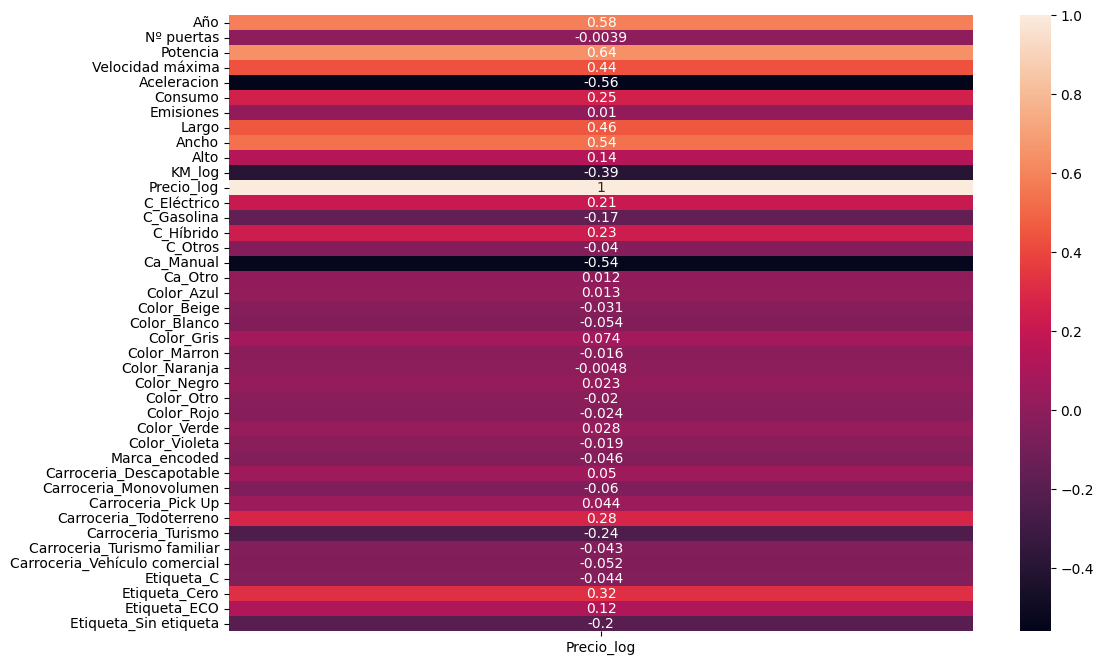

In [3]:
# Creo un nuevo DF de las correlaciones con 'Precio' y hago hetamap

corr = df_datos_autos.corr()
corr_precio = corr.loc[:, ['Precio_log']]


plt.figure(figsize = (12, 8))

sns.heatmap(corr_precio, annot = True)
plt.show()

In [4]:
X = np.array(df_datos_autos[["Consumo", "Velocidad máxima", 'Potencia', 'Año']])

y = np.array(df_datos_autos["Precio_log"])

In [5]:
X.shape, y.shape

((52062, 4), (52062,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

print(f"Conjunto de Train: {X_train.shape, y_train.shape}")
print(f"Conjunto de Test: {X_test.shape, y_test.shape}")

Conjunto de Train: ((31237, 4), (31237,))
Conjunto de Test: ((20825, 4), (20825,))


In [7]:

regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)

# Encontramos los coeficientes de la recta  
print ("weights:", regresion_lineal.coef_)
print ("w_0:", regresion_lineal.intercept_)

weights: [0.01600463 0.00275179 0.00452871 0.08772876]
w_0: -168.5048712232292


In [8]:
yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:10], y_test[:10]):
    print(f"Predicción:{i} \tValor real:{j}")

Predicción:10.031652410155118 	Valor real:10.014626341770096
Predicción:9.381969118559681 	Valor real:9.258273025731484
Predicción:9.775582497661247 	Valor real:9.539716058977092
Predicción:9.905656649289512 	Valor real:10.236776155340316
Predicción:9.712078136120226 	Valor real:9.472012088995733
Predicción:9.772856471252595 	Valor real:9.679781342959442
Predicción:10.40168042488969 	Valor real:10.499325055627958
Predicción:9.767025012734024 	Valor real:9.674137279312395
Predicción:9.912097757356577 	Valor real:9.71057005652877
Predicción:9.983796103887244 	Valor real:10.01681623784313


In [9]:
# Relative Absolute Error
RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

# Relative Square Error
RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

# Adjusted R**2
r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [10]:
print(f"MAE:\t {mean_absolute_error(y_test, yhat)}")
print(f"MSE:\t {mean_squared_error(y_test, yhat)}")
print(f"RMSE:\t {np.sqrt(mean_squared_error(y_test, yhat))}")
print(f"R**2:\t {r2_score(y_test, yhat)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

MAE:	 0.1962478848056649
MSE:	 0.06760722418502045
RMSE:	 0.2600138922923551
R**2:	 0.760877206811386
RAE:	 0.5004648899835404
RSE:	 0.239122793188614
Adjusted R**2:	 0.7608312658328675


In [11]:
# Veamos los valores de yhat, y_test y su diferencia

df_pred = pd.DataFrame()

df_pred["y_test"] = y_test.flatten()
df_pred["yhat"] = yhat.flatten()

df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["yhat"]) / df_pred["y_test"] * 100), 4)

df_pred = df_pred.sort_values("diferencia")

df_pred.head(20)

,y_test,yhat,diferencia
17211,9.878221,9.878209,0.0001
16616,9.878221,9.878209,0.0001
16175,10.021315,10.021343,0.0003
13279,10.247113,10.247155,0.0004
4176,9.878221,9.878172,0.0005
6176,9.888425,9.888363,0.0006
10578,10.023978,10.024041,0.0006
9095,10.023978,10.024041,0.0006
14248,9.846970,9.846900,0.0007
625,10.736201,10.736127,0.0007


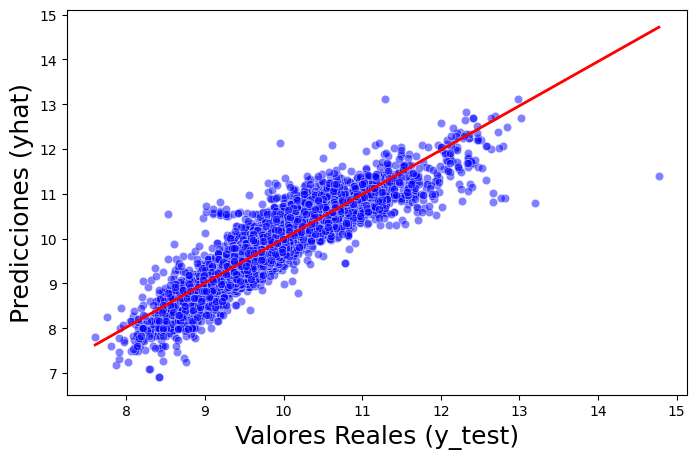

In [12]:
# Suponiendo que yhat y y_test son tus valores predichos y reales respectivamente

# Calcula la línea de regresión
slope, intercept = np.polyfit(yhat.flatten(), y_test.flatten(), 1)
x_values = np.linspace(min(yhat.flatten()), max(yhat.flatten()), 100)
y_values = slope * x_values + intercept

# Grafica el gráfico de dispersión y la línea de regresión
plt.figure(figsize=(8, 5))
sns.scatterplot(x=yhat.flatten(), y=y_test.flatten(), alpha=0.5, color="blue")
plt.plot(x_values, y_values, color='red', linewidth=2, linestyle='-')

plt.xlabel("Valores Reales (y_test)", size=18)
plt.ylabel("Predicciones (yhat)", size=18)

plt.show()